**DataFrame (2D tabular data)**



**Explore Data Structure before Cleaning**

In [338]:
import pandas as pd
data=pd.read_csv("/content/Salary_Data[1].csv")
df=pd.DataFrame(data)
df.head()
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [339]:
df.shape

(6704, 6)

In [340]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [341]:
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


**Count of Unique Values per column**

In [343]:
df[['Age','Gender','Education Level','Job Title','Years of Experience','Salary']].nunique()

,0
Age,41
Gender,3
Education Level,7
Job Title,193
Years of Experience,37
Salary,444


**Count the actual unique values**

In [344]:
#for col in ['Age','Gender','Education Level','Job Title','Years of Experience','Salary']:
#  print(f"Unique values in {col}:")
#  print(df[col].unique())
#  print()

#df['Age'].unique()


In [345]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [346]:
#df['Job Title'].unique()

**Exploratory Data Analysis**

**Summarize statistics using describe()**

In [347]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**Summarize the categorical data using value_counts() method**

**Count unique values including NaN**

In [348]:
df['Age'].value_counts(dropna=False)

,count
Age,
27.0,517
30.0,449
29.0,444
28.0,429
33.0,398
26.0,394
31.0,365
32.0,351
34.0,309


To handle the mssing value, first need to indentify the dependency between the features.

Age <-> Years of Experience

Years of Experience deponds on Age and possibly Job Title

Years of Experience <-> Salary

Salary depends on Years of Experience and possibly Education Level


**Correlation Analysis**

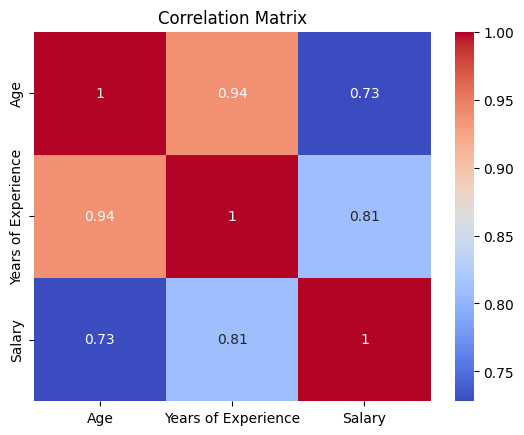

In [349]:
num_cols = ['Age', 'Years of Experience', 'Salary']
df[num_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


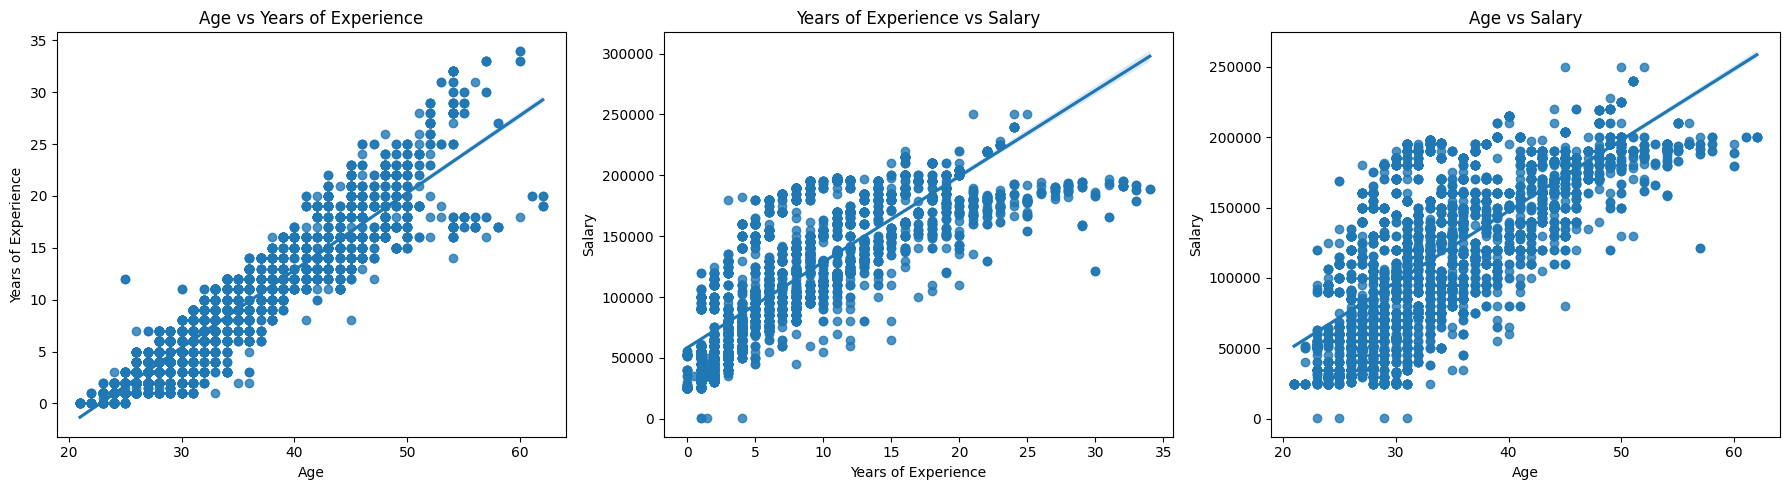

In [350]:
# Create subplots for all pairwise relationships involving Age, Experience, and Salary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Age vs Years of Experience
sns.regplot(x='Age', y='Years of Experience', data=df, ax=axes[0])
axes[0].set_title("Age vs Years of Experience")

# Plot 2: Years of Experience vs Salary
sns.regplot(x='Years of Experience', y='Salary', data=df, ax=axes[1])
axes[1].set_title("Years of Experience vs Salary")

# Plot 3: Age vs Salary
sns.regplot(x='Age', y='Salary', data=df, ax=axes[2])
axes[2].set_title("Age vs Salary")

plt.tight_layout()
plt.show()


**GroupBy Method to explore logical relationships**

In [351]:
df.groupby('Age')['Years of Experience'].mean()

,Years of Experience
Age,
21.0,0.000000
22.0,0.200000
23.0,0.870192
24.0,0.929167
25.0,1.522887
26.0,2.332061
27.0,2.879110
28.0,3.630536
29.0,4.099099


In [352]:
df.groupby('Years of Experience')['Age'].mean()


,Age
Years of Experience,
0.0,23.291667
0.5,23.000000
1.0,25.211111
1.5,27.833333
2.0,26.560656
3.0,27.745847
4.0,28.706897
5.0,29.659148
6.0,31.186788


In [353]:
df.groupby('Years of Experience')['Salary'].mean()


,Salary
Years of Experience,
0.0,29680.233333
0.5,35000.000000
1.0,46992.846296
1.5,36279.166667
2.0,58699.457377
3.0,72944.406977
4.0,83332.090038
5.0,103111.092732
6.0,111891.146119


In [354]:
df.groupby('Job Title')['Years of Experience'].mean()

,Years of Experience
Job Title,
Account Manager,5.000000
Accountant,4.000000
Administrative Assistant,9.000000
Back end Developer,6.065574
Business Analyst,6.000000
...,...
UX Designer,5.000000
UX Researcher,2.000000
VP of Finance,19.000000


In [355]:
#Pivot table to get an idea of the features based on the relationship
#df_pivot=df.pivot_table(index=['Years of Experience'],columns='Age',values='Salary',aggfunc='mean')
#df_pivot

**Handle missing values**

In [356]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [357]:
#Detect the missing values
df[df['Years of Experience'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN


In [358]:
#Fill the missing values based on the Age
df['Years of Experience'] = df.groupby('Age')['Years of Experience'].transform(lambda x: x.fillna(x.mean()))


In [359]:
df[df['Years of Experience'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


**Check the fill up missing value**

In [360]:
#Access data by integer location
df.iloc[5247]

,5247
Age,26.0
Gender,Female
Education Level,Bachelor's Degree
Job Title,Social M
Years of Experience,2.332061
Salary,NaN


In [361]:
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.000000,NaN
5247,26.0,Female,Bachelor's Degree,Social M,2.332061,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.000000,NaN


**Salary depends on Age**

In [362]:
df['Salary'] = df.groupby('Job Title')['Salary'].transform(lambda x: x.fillna(x.mean()))


In [363]:
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
5247,26.0,Female,Bachelor's Degree,Social M,2.332061,NaN


In [364]:
df.iloc[6455]

,6455
Age,36.0
Gender,Male
Education Level,Bachelor's Degree
Job Title,Sales Director
Years of Experience,6.0
Salary,124112.903226


Many of the rows are having majority of the attributes as NaN

In [365]:
filtered_df=df[df['Job Title']=='Social M	']
average_salary=filtered_df['Salary'].mean()
print(average_salary)

nan


In [366]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Social Media Specialist,1
Senior Software Architect,1
Developer,1


Quantify how many Rows are affected

In [367]:
#Rows having All attributes as NaN
df[df.isnull().all(axis=1)]



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
#Rows where most attributes are NaN
df[df.isnull().sum(axis=1) >= 4]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


Drop thoughs rows which are having all null vales and more 4 null values

In [369]:
#Drop rows having all NaN values
df=df.dropna(how='all')


In [370]:
#Drop rows with > 4 missing coulmns
#df=df[df.isnull().sum(axis=1) < 5]

In [371]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,0
Salary,1


In [372]:
df[df.isnull().sum(axis=1) >= 1]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.000000,100000.0
5247,26.0,Female,Bachelor's Degree,Social M,2.332061,NaN


In [373]:
#Fill the missing values of Education Level based on the Salary
df['Education Level'] = df.groupby('Job Title')['Education Level']\
    .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else 'Unknown')


/tmp/ipython-input-373-523387729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df.groupby('Job Title')['Education Level']\


In [374]:
df.iloc[2009]

,2011
Age,27.0
Gender,Male
Education Level,Unknown
Job Title,Developer
Years of Experience,7.0
Salary,100000.0


In [375]:
df[df.isnull().sum(axis=1) >= 1]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5247,26.0,Female,Bachelor's Degree,Social M,2.332061,NaN


In [376]:
df['Salary'] = df.groupby('Age')['Salary'].transform(lambda x: x.fillna(x.mean()))


/tmp/ipython-input-376-2139648184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = df.groupby('Age')['Salary'].transform(lambda x: x.fillna(x.mean()))


In [377]:
df.iloc[5245]

,5247
Age,26.0
Gender,Female
Education Level,Bachelor's Degree
Job Title,Social M
Years of Experience,2.332061
Salary,65949.10687


In [378]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [379]:
df.shape

(6702, 6)

In [380]:
#df.dropna(subset=["Unnamed: 0"],axis=0, inplace=True)
#df.isnull().sum()
#df[['Age','Years of Experience','Salary']]=df[['Age','Years of Experience','Salary']].fillna(df[['Age','Years of Experience','Salary']].mean())


The data types of the Gender, Education Level,and Job Title are in Object to handle the missing values the NAN are rfill with constant value that is  **"Unknown"**.

**Other methods.**

Fill the missing values with most frequent value by using **"Mode"** .

df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])


The other method is fill the NAN with the forward fill ot backward fill


**Forward fill (previous value)**

df['column_name'] = df['column_name'].fillna(method='ffill')

**Backward fill (next value)**

df['column_name'] = df['column_name'].fillna(method='bfill')

In [381]:
#df[['Gender','Education Level','Job Title']]=df[['Gender','Education Level','Job Title']].fillna('Unknown')
#df.isnull().sum()

**Drop the entire Row and Column that has NAN values**

Use df.dropna()

axis=1: drops the entire column

axis=0 drops the entire row

df.dropna(subset=["Unnamed: 0"],axis=0,
inplace=True)



**Drop specific rows or columns**

drop() is use remove specific rows or columns by index

df.drop('Unnamed: 0', axis=1, inplace=True)

In [382]:
#df.dropna(subset=["Unnamed: 0"],axis=0,inplace=True)
#df.drop('Unnamed: 0', axis=1, inplace=True)


**Data Formatting**

In [383]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'Unknown', 'High School', 'phD'], dtype=object)

In [384]:
df['Education Level'].value_counts()


,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
Unknown,1
phD,1


**Normaliztion Dictionary**

Create a dictionary to convert all variations into a single standardized value.

In [385]:
mapping={
    "Bachelor's Degree":"Bachelor's Degree",
    "Bachelor's" :"Bachelor's Degree",
    "Master's Degree":"Master's Degree",
    "Master's":"Master's Degree",
    "High School":"High School",
    "phD":"PhD",
    "PhD":"PhD",
    "Uknown":"Unknown"

}

#Apply standardization
df['Education Level']=df['Education Level'].replace(mapping)

/tmp/ipython-input-385-161997389.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level']=df['Education Level'].replace(mapping)


In [386]:
df['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'Unknown',
       'High School'], dtype=object)

In [387]:
#import pandas as pd
#import re

#def clean_format(value):
#    if isinstance(value, str):
#        value = value.lower().strip()  # lowercase and remove extra spaces
#        value = re.sub(r'[^\w\s]', '', value)  # remove punctuation like ' or .
#        return value
#    return value

#df['Education Level'] = df['Education Level'].apply(clean_format)



In [388]:
df['Education Level'].value_counts()


,count
Education Level,
Bachelor's Degree,3023
Master's Degree,1861
PhD,1369
High School,448
Unknown,1


**Data Types from Float to Integer**

Correcting data types

To identify data types:

df.dtyes is used to identify data type

To convert data types:

df.astypes() is used to convert data type



In [389]:
#df[['Age','Years of Experience']]=df[['Age','Years of Experience']].astype(int)
#df.dtypes

**2. Handling Duplicates**

In [390]:
duplicates=df[df.duplicated()]

Count of total duplicate rows

In [391]:
print(duplicates)

       Age  Gender    Education Level                              Job Title  \
195   28.0    Male  Bachelor's Degree                Junior Business Analyst   
250   30.0  Female  Bachelor's Degree           Junior Marketing Coordinator   
251   38.0    Male    Master's Degree                   Senior IT Consultant   
252   45.0  Female                PhD                Senior Product Designer   
253   28.0    Male  Bachelor's Degree  Junior Business Development Associate   
...    ...     ...                ...                                    ...   
6699  49.0  Female                PhD                  Director of Marketing   
6700  32.0    Male        High School                        Sales Associate   
6701  30.0  Female  Bachelor's Degree                      Financial Manager   
6702  46.0    Male    Master's Degree                      Marketing Manager   
6703  26.0  Female        High School                        Sales Executive   

      Years of Experience    Salary  
1

Since the dataset is real-world dataset there are chance of getting duplicate values.

But the shape of the rows is 6702 and the duplicate rows is 4912

In [392]:
#Check number of duplicate rows
df.duplicated().sum()


np.int64(4912)

But the shape of the rows is 6702 and the duplicate rows is 4912 which makes 6702-4912=1790 (unique rows)

This is unsually high duplicate rows

73% of the database contain duplicates

In [393]:
duplicates = df[df.duplicated()]
display(duplicates.head())


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's Degree,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's Degree,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's Degree,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's Degree,Junior Business Development Associate,2.0,40000.0


In [394]:
#Drop the duplicate rows to avoid the bias during training a model
df.drop_duplicates(inplace=True)

/tmp/ipython-input-394-88817973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [395]:
df.shape

(1790, 6)

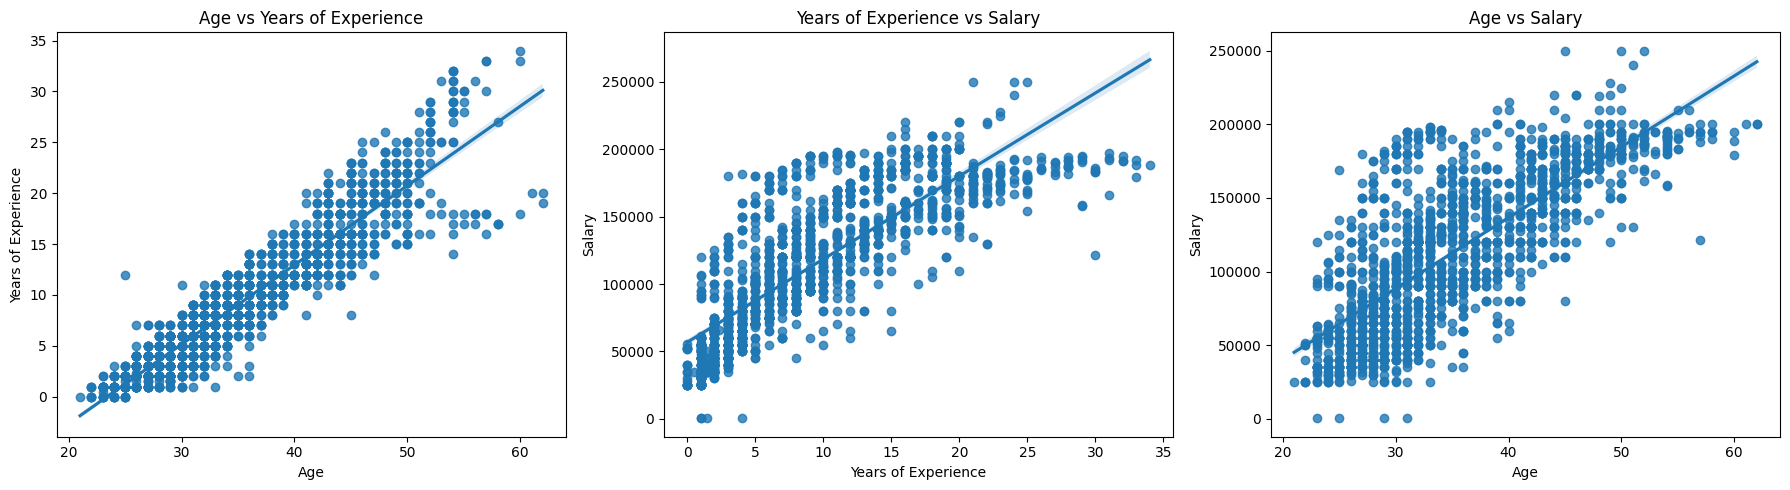

In [396]:
#Create subplots for all pairwise relationships involving Age, Experience, and Salary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Age vs Years of Experience
sns.regplot(x='Age', y='Years of Experience', data=df, ax=axes[0])
axes[0].set_title("Age vs Years of Experience")

# Plot 2: Years of Experience vs Salary
sns.regplot(x='Years of Experience', y='Salary', data=df, ax=axes[1])
axes[1].set_title("Years of Experience vs Salary")

# Plot 3: Age vs Salary
sns.regplot(x='Age', y='Salary', data=df, ax=axes[2])
axes[2].set_title("Age vs Salary")

plt.tight_layout()
plt.show()


**Outliers**

<Figure size 1200x500 with 0 Axes>

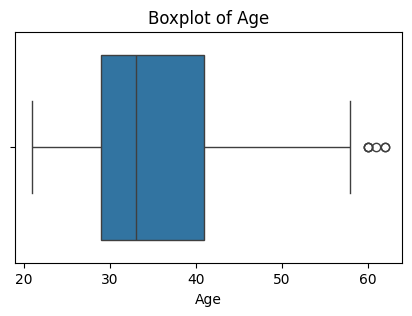

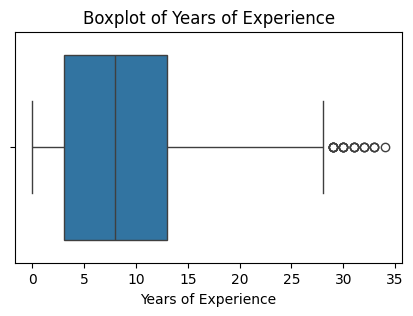

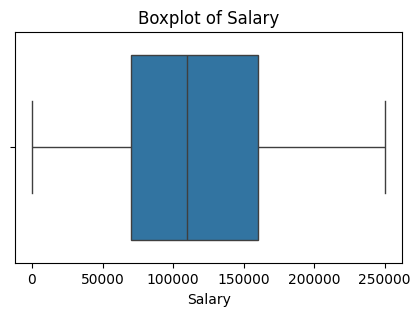

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot for numeric columns
plt.figure(figsize=(12,5))

numeric_cols = ["Age", "Years of Experience", "Salary"]
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [398]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Check outliers for each numeric column
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")

Outliers in Age: 6 rows
Outliers in Years of Experience: 22 rows
Outliers in Salary: 0 rows


In [399]:
import numpy as np
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
print("Q1",Q1)
print("Q3",Q3)
IQR = Q3 - Q1
print("IQR",IQR)
Age_lower_bound = Q1 - 1.5 * IQR
Age_upper_bound = Q3 + 1.5 * IQR
print("Lower Bound",Age_lower_bound)
print("Upper Bound",Age_upper_bound)
#Cap the outliers
df["Age"]=np.where(df["Age"]<Age_lower_bound,Age_lower_bound,df["Age"])
df["Age"]=np.where(df["Age"]>Age_upper_bound,Age_upper_bound,df["Age"])


Q1 28.0
Q3 38.0
IQR 10.0
Lower Bound 13.0
Upper Bound 53.0


/tmp/ipython-input-399-3856261141.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=np.where(df["Age"]<Age_lower_bound,Age_lower_bound,df["Age"])
/tmp/ipython-input-399-3856261141.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=np.where(df["Age"]>Age_upper_bound,Age_upper_bound,df["Age"])


In [400]:
Q1 = data["Years of Experience"].quantile(0.25)
Q3 = data["Years of Experience"].quantile(0.75)
print("Q1",Q1)
print("Q3",Q3)
IQR = Q3 - Q1
print("IQR",IQR)
#Ensuring lower bound is at least 0
Exp_lower_bound = max(0,Q1 - 1.5 * IQR)
Exp_upper_bound = Q3 + 1.5 * IQR
print("Lower Bound",Exp_lower_bound)
print("Upper Bound",Exp_upper_bound)

#Cap the outliers
df["Years of Experience"]=np.where(df["Years of Experience"]<Exp_lower_bound,Exp_lower_bound,df["Years of Experience"])
df["Years of Experience"]=np.where(df["Years of Experience"]>Exp_upper_bound,Exp_upper_bound,df["Years of Experience"])

Q1 3.0
Q3 12.0
IQR 9.0
Lower Bound 0
Upper Bound 25.5


/tmp/ipython-input-400-2425313580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Years of Experience"]=np.where(df["Years of Experience"]<Exp_lower_bound,Exp_lower_bound,df["Years of Experience"])
/tmp/ipython-input-400-2425313580.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Years of Experience"]=np.where(df["Years of Experience"]>Exp_upper_bound,Exp_upper_bound,df["Years of Experience"])


In [401]:
for col in ["Age", "Years of Experience"]:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col} after handling: {len(outliers)} rows")


Outliers in Age after handling: 0 rows
Outliers in Years of Experience after handling: 0 rows


**Data Distribution**

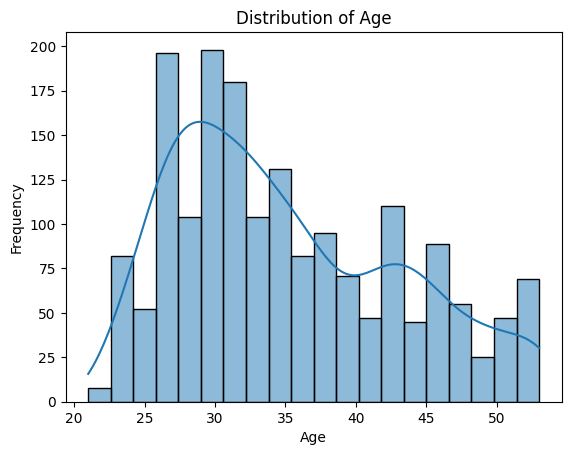

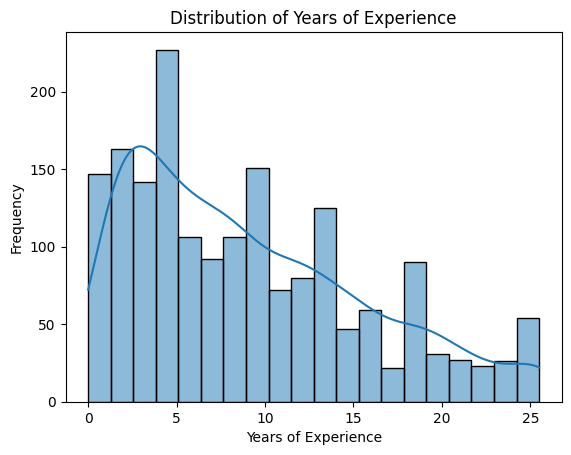

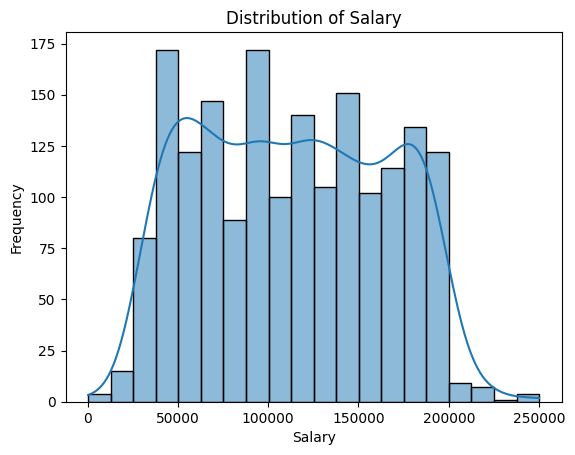

In [402]:
from scipy.stats import shapiro
features = ['Age','Years of Experience','Salary']
for col in features:
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Skweness of Data**

In [403]:
df[['Age','Years of Experience','Salary']].skew()

,0
Age,0.564776
Years of Experience,0.730065
Salary,0.077657


In [404]:
import numpy as np
df[['Age','Years of Experience']] = np.log(df[['Age','Years of Experience']] + 1)

/tmp/ipython-input-404-1272405080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age','Years of Experience']] = np.log(df[['Age','Years of Experience']] + 1)


In [405]:
df[['Age','Years of Experience','Salary']].skew()

,0
Age,0.240356
Years of Experience,-0.407645
Salary,0.077657


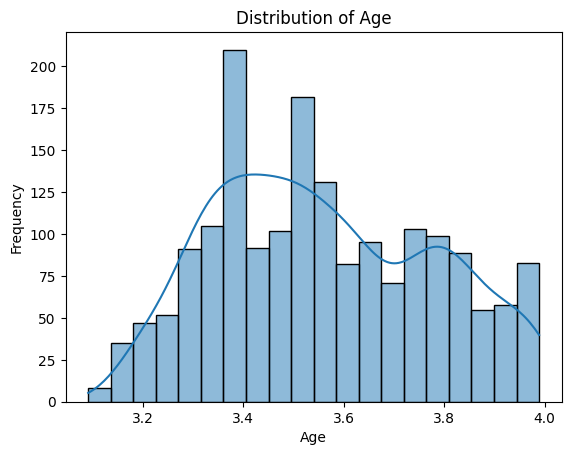

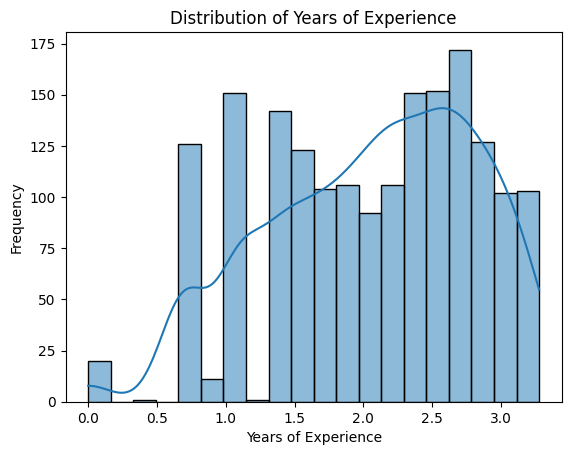

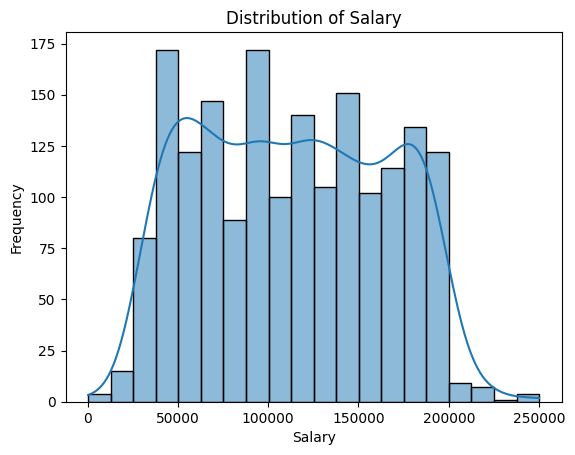

In [406]:
from scipy.stats import shapiro
features = ['Age','Years of Experience','Salary']
for col in features:
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Data Normalization**

Simple Feature Sclaing

In [407]:
#df[['Age','Years of Experience','Salary']]=df[['Age','Years of Experience','Salary']]/df[['Age','Years of Experience','Salary']].max()
#df.head()

Min-Max Normalization

In [408]:
#df['Salary']=(df['Salary']-df['Salary'].min())/(df['Salary'].max()-df['Salary'].min())

#df.head()

**Z-score**

In [409]:
df[['Age','Years of Experience']]=(df[['Age','Years of Experience']]-df[['Age','Years of Experience']].mean())/df[['Age','Years of Experience']].std()
df.head()

/tmp/ipython-input-409-3121274157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age','Years of Experience']]=(df[['Age','Years of Experience']]-df[['Age','Years of Experience']].mean())/df[['Age','Years of Experience']].std()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.297563,Male,Bachelor's Degree,Software Engineer,-0.355169,90000.0
1,-0.892422,Female,Master's Degree,Data Analyst,-0.892662,65000.0
2,1.231502,Male,PhD,Senior Manager,0.945037,150000.0
3,0.229155,Female,Bachelor's Degree,Sales Associate,0.026187,60000.0
4,1.883627,Male,Master's Degree,Director,1.305517,200000.0


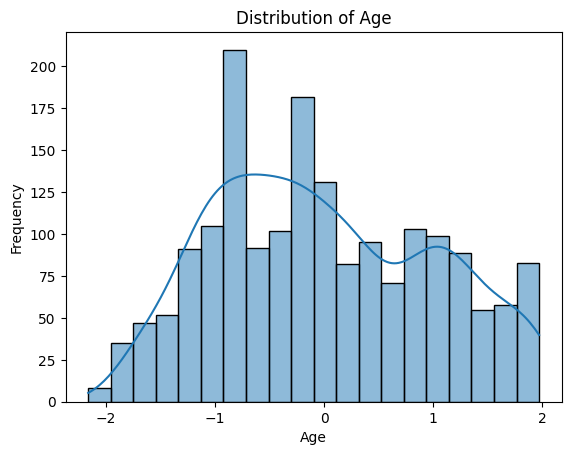

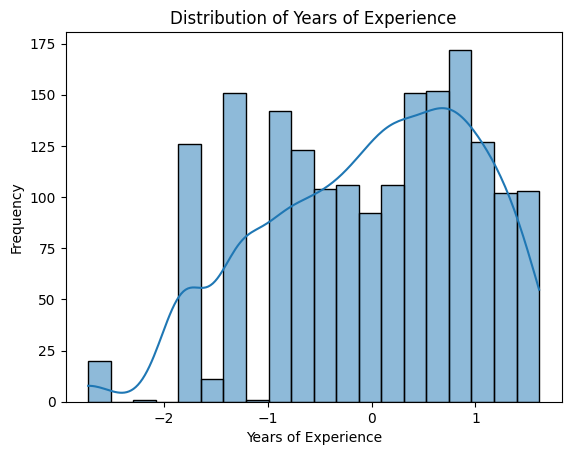

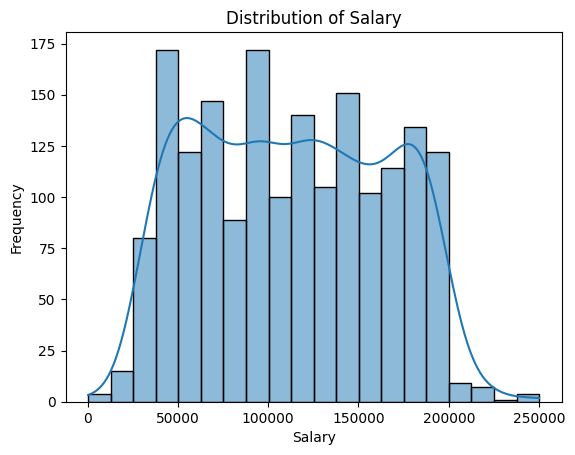

In [410]:
from scipy.stats import shapiro
features = ['Age','Years of Experience','Salary']
for col in features:
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



In [411]:
print("{:.2f}".format(df["Age"].mean()))
print("{:.2f}".format(df["Years of Experience"].mean()))
print("{:.2f}".format(df["Salary"].mean()))

-0.00
-0.00
113199.87


In [412]:
new_var_column=df.select_dtypes(include=['int64','float64'])
print(new_var_column.var())
print(new_var_column.std())

Age                    1.000000e+00
Years of Experience    1.000000e+00
Salary                 2.657020e+09
dtype: float64
Age                        1.000000
Years of Experience        1.000000
Salary                 51546.289983
dtype: float64


**Correlation Matrix**

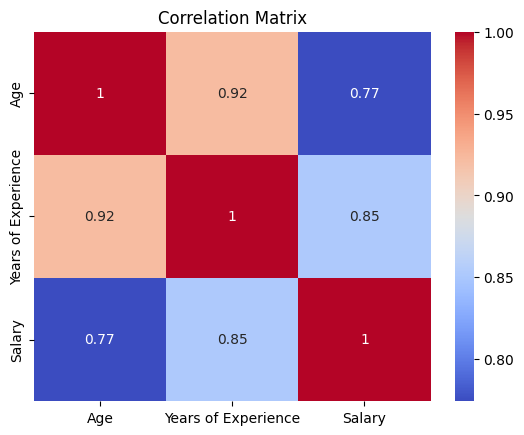

In [413]:
num_cols = ['Age', 'Years of Experience', 'Salary']
df[num_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [414]:
df['Gender'].value_counts()

,count
Gender,
Male,969
Female,814
Other,7


In [415]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [416]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,769
Master's Degree,569
PhD,341
High School,110
Unknown,1


In [417]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

education_mapping = {
    "Unknown": 0,             # Treat as lowest or undefined level
    "Bachelor's Degree": 1,
    "Master's Degree": 2,
    "PhD": 3
}
df['Education Level'] = df['Education Level'].map(education_mapping)

# One-Hot Encoding (for Gender and Job Title)
df = pd.get_dummies(df, columns=['Gender'], drop_first=False)

# Frequency Encoding for Job Title
job_freq = df['Job Title'].value_counts()
df['Job Title_Freq'] = df['Job Title'].map(job_freq)


/tmp/ipython-input-417-4240998835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].map(education_mapping)


In [418]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Job Title_Freq
0,-0.297563,1.0,Software Engineer,-0.355169,90000.0,False,True,False,78
1,-0.892422,2.0,Data Analyst,-0.892662,65000.0,True,False,False,51
2,1.231502,3.0,Senior Manager,0.945037,150000.0,False,True,False,2
3,0.229155,1.0,Sales Associate,0.026187,60000.0,True,False,False,17
4,1.883627,2.0,Director,1.305517,200000.0,False,True,False,1


In [419]:
print(df['Education Level'].isna())


0       False
1       False
2       False
3       False
4       False
        ...  
6623    False
6624     True
6625    False
6628    False
6631    False
Name: Education Level, Length: 1790, dtype: bool


Accuracy: 0.7849867723021282
Train Accuracy: 0.7910765074301789
Test Accuracy: 0.7849867723021282
Mean Absolute Error: 17476.670709373662
Mean Squared Error: 581026398.4149253


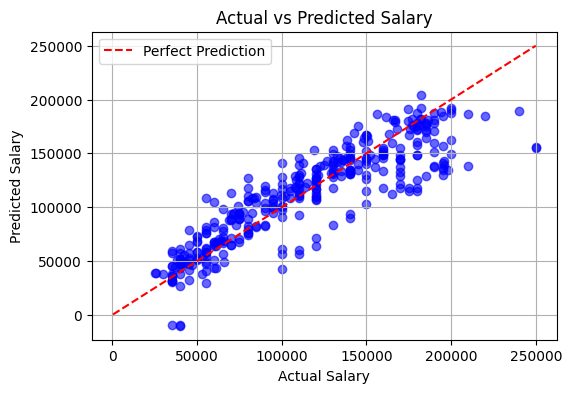

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# 1. Features and Target
X = df.drop(columns=['Salary', 'Job Title'])  # Drop unused columns
y = df['Salary']
X = X.fillna(X.mean())
y = y[X.index]  # Make sure y stays aligned with X

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Train Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

#Make predictions
y_pred=model.predict(X_test)

#Accuracy
acc=model.score(X_test,y_test)
print("Accuracy:",acc)

#Train accuracy
train_acc=model.score(X_train,y_train)
print("Train Accuracy:",train_acc)

#Test accuracy
test_acc=model.score(X_test,y_test)
print("Test Accuracy:",test_acc)

#Mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)


#Mean squred error (MSE)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)


# 6. Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()

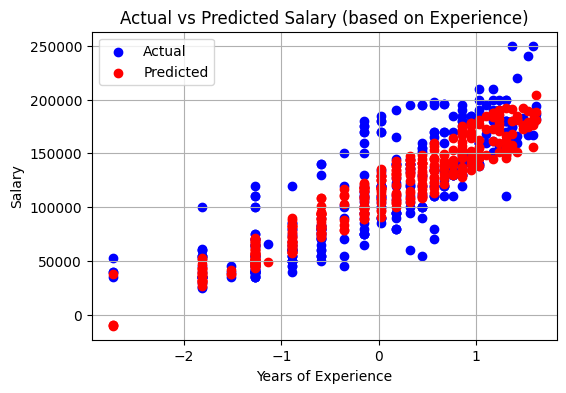

In [421]:
plt.figure(figsize=(6,4))
plt.scatter(X_test['Years of Experience'], y_test, color='blue', label="Actual")
plt.scatter(X_test['Years of Experience'], y_pred, color='red', label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (based on Experience)")
plt.legend()
plt.grid(True)
plt.show()


The `confusion_matrix` function is designed for classification tasks with discrete output classes. Since the target variable 'Salary' is continuous, this is a regression problem, and `confusion_matrix` is not an appropriate evaluation metric.

Instead, metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (which have been calculated above) are used to evaluate the performance of regression models.